In [2]:
%matplotlib inline
import torch
import torchvision
from torchvision import transforms
from torch import nn
import numpy as np
import  matplotlib.pyplot as plt
import cv2

# 数据预处理 #

In [3]:
#转换样式
transform = transforms.RandomChoice([transforms.RandomAffine((5,5),scale=(0.8,0.8),fill=(0,0,255))
                                    ,transforms.ColorJitter(brightness=(1.2,1.2),contrast=(1.4,1.4), saturation=(1.4,1.4))
                                    ,transforms.RandomChoice([transforms.ColorJitter(brightness=(1.5,1.5))
                                                              ,transforms.ColorJitter(brightness=(0.5,0.5))
                                                              ])
                                    ])
datasets_trans = transforms.Compose([
                transform
                ,transforms.ToTensor()
])

In [4]:
#加载数据
datasets = torchvision.datasets.ImageFolder('../datasets/data_classify/train'
                                            ,datasets_trans
                                            )

### 查看类别名及对应索引 ###

In [5]:
print(datasets.class_to_idx)

{'apple': 0, 'banana': 1, 'corn': 2, 'durian': 3, 'peanut': 4}


### 获得bs为100的随机数据集 ###

In [6]:
data_loader = torch.utils.data.DataLoader(datasets
                                          ,batch_size=100
                                          ,shuffle=True
        )
sample = iter(data_loader)

tensor([1, 2, 1, 2, 0, 2, 3, 3, 1, 3, 2, 1, 3, 4, 0, 3, 1, 1, 0, 3, 3, 0, 0, 3,
        2, 2, 4, 3, 1, 0, 2, 1, 3, 1, 3, 3, 1, 0, 3, 1, 1, 0, 3, 1, 2, 0, 3, 3,
        0, 3, 1, 0, 3, 3, 0, 3, 2, 0, 3, 3, 3, 3, 4, 0, 1, 3, 3, 1, 3, 1, 3, 3,
        1, 0, 0, 0, 1, 2, 2, 1, 1, 0, 4, 3, 3, 1, 3, 2, 1, 3, 4, 3, 1, 0, 0, 3,
        3, 4, 0, 0])


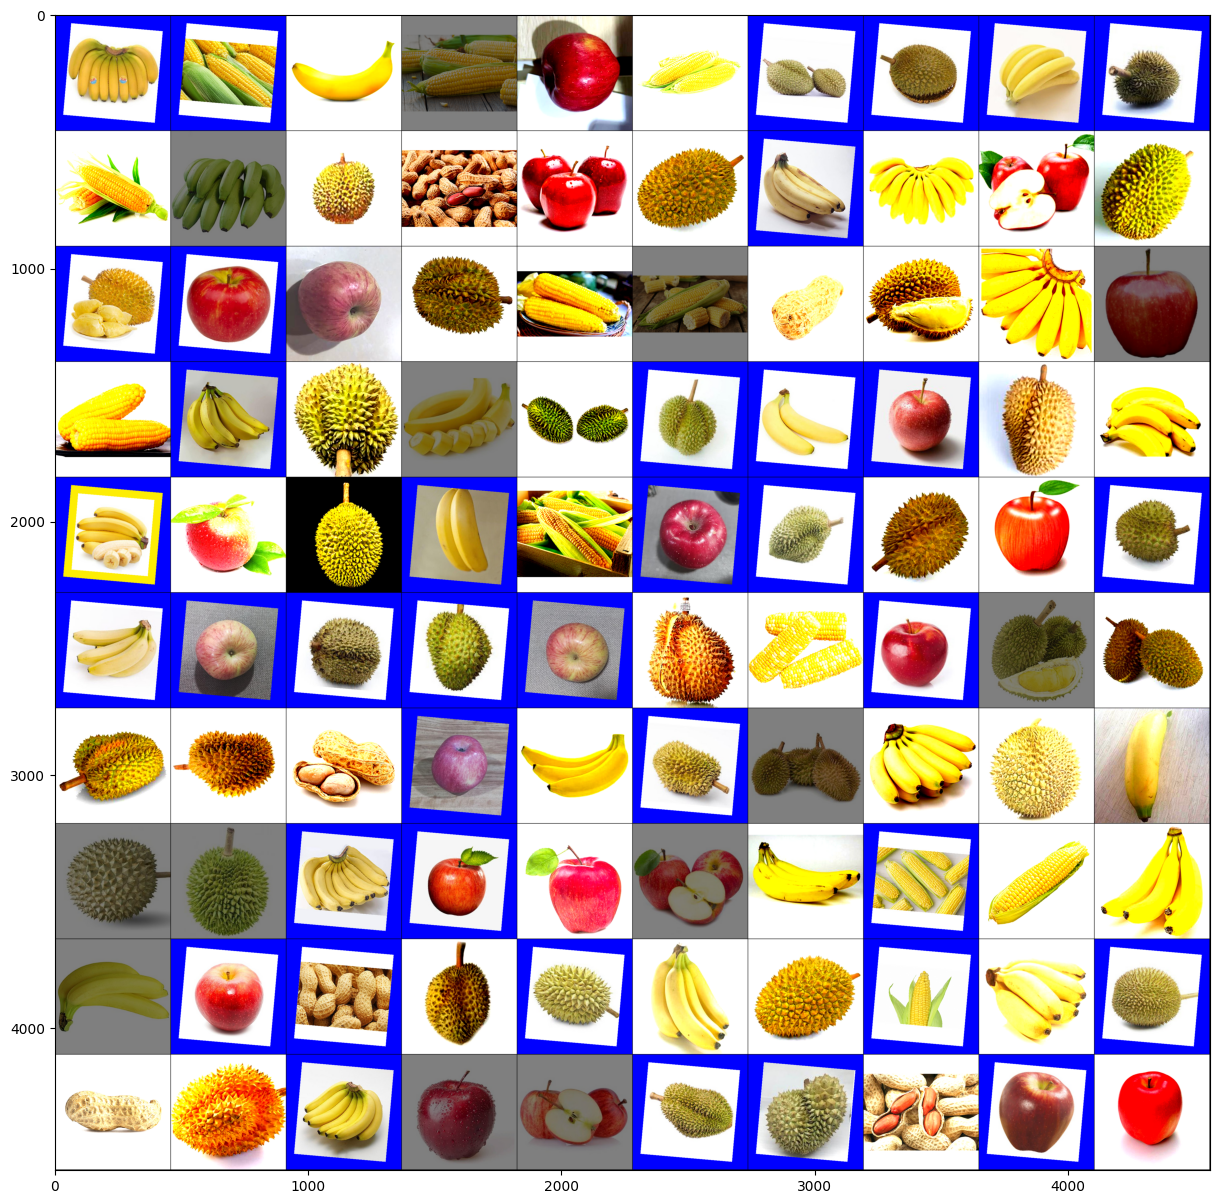

In [7]:
sample1 = next(sample)
img,lab = sample1
grid = torchvision.utils.make_grid(img,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print(lab)

torch.Size([100, 3, 454, 454])